## Airfoil 

### Importing the data and standarization

In [1]:
import pandas as pd
df = pd.read_csv('kwd_dane.csv', ';')

print(df.shape)
dir(df)
airfoil_data = df[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']]
airfoil_target = df[['Column6']]

print(airfoil_data.head())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(airfoil_data)
scaled_target = scaler.fit_transform(airfoil_target)

print('\nData after standarization: \n',scaled_data)

C:\Users\Jakub Filipowski\AppData\Local\Temp\ipykernel_1704\462444645.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('kwd_dane.csv', ';')


(1503, 6)
   Column1  Column2  Column3  Column4   Column5
0      800      0.0   0.3048     71.3  0.002663
1     1000      0.0   0.3048     71.3  0.002663
2     1250      0.0   0.3048     71.3  0.002663
3     1600      0.0   0.3048     71.3  0.002663
4     2000      0.0   0.3048     71.3  0.002663

Data after standarization: 
 [[-0.6620227  -1.14640293  1.79929926  1.31293526 -0.64480461]
 [-0.59856135 -1.14640293  1.79929926  1.31293526 -0.64480461]
 [-0.51923465 -1.14640293  1.79929926  1.31293526 -0.64480461]
 ...
 [ 0.353359    1.49044302 -0.37373954 -0.72334483  3.17277251]
 [ 0.67066578  1.49044302 -0.37373954 -0.72334483  3.17277251]
 [ 1.08316459  1.49044302 -0.37373954 -0.72334483  3.17277251]]


### Dividing the data into test and train bundles

In [2]:
from sklearn.model_selection import train_test_split

airfoil_train_data, airfoil_test_data, \
airfoil_train_target, airfoil_test_target = \
train_test_split(scaled_data,scaled_target, test_size=0.1, random_state=10)

### Training the model

In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(airfoil_train_data, airfoil_train_target)

LinearRegression()

### Checking the accuracy of the model

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(LinearRegression(), airfoil_data, airfoil_target, cv=8)
print("Scores after cross-validation: \n", scores)
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(airfoil_test_target, linear_regression.predict(airfoil_test_data)))
print('Variance score: %.2f' % r2_score(airfoil_test_target, linear_regression.predict(airfoil_test_data)))
print('Coefficients of a learned model: \n', linear_regression.coef_)

lasso_regression = Lasso(alpha=0.01)
lasso_regression.fit(airfoil_train_data, airfoil_train_target)
score = lasso_regression.score(airfoil_test_data, airfoil_test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

Scores after cross-validation: 
 [ 0.72438555  0.61055508  0.47759241  0.58364592  0.49893908 -0.7028952
  0.12153927  0.58272628]
Mean squared error of a learned model: 0.43
Variance score: 0.53
Coefficients of a learned model: 
 [[-0.57924376 -0.35579577 -0.48860374  0.23074334 -0.28675122]]
Lasso regression variance score: 0.53


### Checking the prediction for a specific case from the data

In [5]:
id=1
linear_regression_prediction = linear_regression.predict(airfoil_test_data[id,:].reshape(1,-1))

print(linear_regression_prediction)


[[0.27059092]]


## Using Polynomial Features to enhance the model

In [6]:
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(6, )#interaction_only=True)
airfoil_train_poly = pt.fit_transform(airfoil_train_data)
airfoil_test_poly = pt.fit_transform(airfoil_test_data)

lr_poly = LinearRegression(normalize=True)
lr_poly.fit(airfoil_train_poly, airfoil_train_target)

from sklearn.metrics import mean_squared_error

print("Mean squared error of a linear moderl using polynomial features: %.2f" % 
      mean_squared_error(airfoil_test_target, lr_poly.predict(airfoil_test_poly)))
score = lr_poly.score(airfoil_test_poly, airfoil_test_target) #r2_score
print("Linear Regression variance score using polynomial features: %.2f" % score)

G:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Mean squared error of a linear moderl using polynomial features: 0.14
Linear Regression variance score using polynomial features: 0.85


### Plotting the importance of the degree of Polynomial Features in relation to the model accuracy

G:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardS

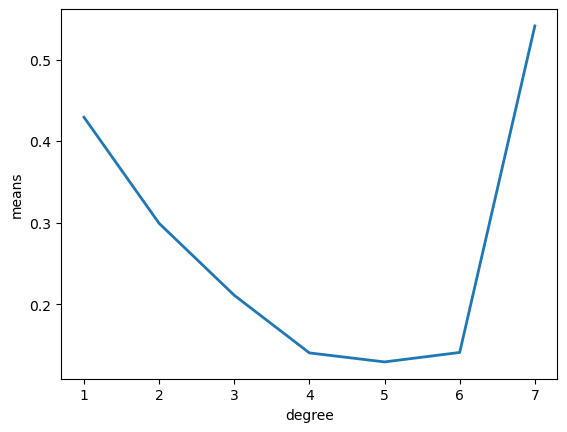

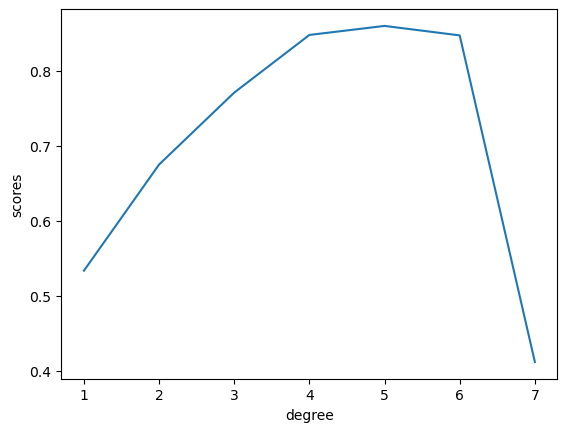

In [7]:
import matplotlib.pyplot as plt
import numpy as np

means = []
scores = []

for i in range(1,8,1):
    pt = PolynomialFeatures(i, )#interaction_only=True)
    airfoil_train_poly = pt.fit_transform(airfoil_train_data)
    airfoil_test_poly = pt.fit_transform(airfoil_test_data)

    lr_poly = LinearRegression(normalize=True)
    lr_poly.fit(airfoil_train_poly, airfoil_train_target)
    
    means.append(mean_squared_error(airfoil_test_target, lr_poly.predict(airfoil_test_poly)))
    scores.append(lr_poly.score(airfoil_test_poly, airfoil_test_target)) #r2_score

# plot

features = np.arange(1,8)

fig, ax = plt.subplots()

ax.plot(features, means, linewidth=2.0)

plt.ylabel('means')
plt.xlabel('degree')

plt.show()

fig, ax = plt.subplots()

ax.plot(features, scores)

plt.ylabel('scores')
plt.xlabel('degree')

plt.show()   